<a href="https://colab.research.google.com/github/LarissaHa/rrr25/blob/main/package_a_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from googleapiclient.discovery import build
from google.oauth2 import service_account
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/MyDrive

Mounted at /gdrive
/gdrive/MyDrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [3]:
# BASELINE VALUES

# Replace with the path to your JSON key file
SERVICE_ACCOUNT_FILE = 'rrr25-data-analysis-db7b83bbe62c.json'

# Define the scopes needed for accessing Google Sheets
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

# Authenticate using the service account credentials
creds = service_account.Credentials.from_service_account_file(
    SERVICE_ACCOUNT_FILE, scopes=SCOPES)

# Build the Google Sheets API client
service = build('sheets', 'v4', credentials=creds)

# Replace with your spreadsheet ID and range
SPREADSHEET_ID = '11y1DBGSh7KrV28QKlPoc6wwfoyyykpKa6hWhCdVJlWA'
RANGE_NAME = 'overview!A12:AA100'

# Call the Sheets API to get the data'
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME).execute()
values = result.get('values', [])

# Print the retrieved data
baseline = pd.DataFrame(values[1:], columns=values[0])
print(len(baseline))
baseline.head()

73


,#,date,name,division,division2,stage,team 1,team 2,game #,observers,...,A,SO,SOwDT,R,avgCOP/R,first Serve,QScore,Touches,T/Point,Ratio
0,1,10/12/2024,STS Championship,open,Pro,Finals,J.A.R.V.I.S.,Ultra Instinct,1,yes,...,16.98,45.28,11.32,5.66,3.33,0.49,33.1378,156,2.943396226,0.6602564103
1,2,,STS Championship,open,Pro,Finals,J.A.R.V.I.S.,Ultra Instinct,2,yes,...,7.69,30.77,12.82,15.38,3.5,0.41,31.34,117,3,0.6666666667
2,3,,Spikeball Rickmond Major,open,Pro,Finals,In System,Numb,1,yes,...,18.92,45.95,10.81,5.41,3,0.54,28.875,116,3.135135135,0.6810344828
3,4,,Spikeball Rickmond Major,open,Pro,Finals,In System,Numb,2,yes,...,32.14,25,7.14,17.86,3,0.46,68.405,95,3.392857143,0.7052631579
4,5,,Spikeball Rickmond Major,open,Pro,Finals,In System,Numb,3,yes,...,12.5,25,10,10,3.25,0.4,12.5,99,2.475,0.595959596


In [4]:
# PACKAGE A VALUES

# Replace with the path to your JSON key file
SERVICE_ACCOUNT_FILE = 'rrr25-data-analysis-db7b83bbe62c.json'

# Define the scopes needed for accessing Google Sheets
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

# Authenticate using the service account credentials
creds = service_account.Credentials.from_service_account_file(
    SERVICE_ACCOUNT_FILE, scopes=SCOPES)

# Build the Google Sheets API client
service = build('sheets', 'v4', credentials=creds)

# Replace with your spreadsheet ID and range
SPREADSHEET_ID = '1hSngEZkkVH5VwEjVUFF7wp9UkfN6LcS_Es8kzN9f8aI'
RANGE_NAME = 'overview!A12:AA100'

# Call the Sheets API to get the data'
sheet = service.spreadsheets()
result = sheet.values().get(spreadsheetId=SPREADSHEET_ID, range=RANGE_NAME).execute()
values = result.get('values', [])

# Print the retrieved data
package_a = pd.DataFrame(values[1:], columns=values[0])
print(len(package_a))
package_a.head()

57


,#,date,name,division,division2,stage,team 1,team 2,game #,observers,...,A,SO,SOwDT,R,avgCOP/R,first Serve,QScore,Touches,T/Point,Ratio
0,1,3/15/2025,USAR Orlando Regionals,open,,Finals,Will Picone/Dan Abams,Ryan Gross/Gabe Finnochi,1,yes,...,15.79,39.47,7.89,7.89,3.33,0.53,44.5687,120,3.157894737,0.6833333333
1,2,3/15/2025,USAR Orlando Regionals,open,,Finals,Will Picone/Dan Abams,Ryan Gross/Gabe Finnochi,2,yes,...,18.18,24.24,6.06,24.24,3.63,0.61,98.8312,129,3.909090909,0.7441860465
2,3,3/15/2025,USAR Orlando Regionals,open,,Semis,Ben Savage/Dawson Morgan,Ryan Gross/Gabe Finnochi,1,no,...,10,42.5,25,15,3.33,0.43,64.95,156,3.9,0.7435897436
3,4,3/15/2025,USAR Orlando Regionals,open,,Semis,Ben Savage/Dawson Morgan,Ryan Gross/Gabe Finnochi,2,no,...,29.41,29.41,14.71,14.71,3.2,0.59,63.1045,116,3.411764706,0.7068965517
4,5,3/15/2025,USAR Orlando Regionals,women,,Finals,Carry Sets,11:1,1,no,...,12.12,30.3,18.18,18.18,3.17,0.39,71.5006,123,3.727272727,0.7317073171


In [5]:
#baseline = pd.read_excel('/content/baseline_stats.xlsx', sheet_name='baseline')

In [6]:
#len(baseline)

In [7]:
#package_a = pd.read_excel('/content/baseline_stats.xlsx', sheet_name='package_a')

In [8]:
#len(package_a)

In [9]:
# prompt: drop all rows from package_a where stage is "Groupstage", also drop all rows where status is "to be done"

package_a = package_a[package_a['stage'] != 'Group Stage']
package_a = package_a[package_a['status'] != 'to be done']
print(len(package_a))
#package_a

48


In [10]:
baseline_work = baseline.drop(columns=['#', 'date', 'name', 'division2', 'stage', 'team 1', 'team 2',
       'game #', 'observers', 'link to ressource', 'status', '', 'notes'])
baseline_work.rename(columns={
    '#PS': 'points',
    'DF': 'double faults',
    'PWoS': 'points won on serve',
    'A': 'aces',
    'SO': 'sideouts',
    'SOwDT': 'sideouts with defensive touch',
    'R': 'rallies',
    'T/Point': 'touches per point',
    'Ratio': 'TP ratio',
    'avgCOP/R': 'average change of possession',
}, inplace=True)

In [11]:
baseline_work.columns

Index(['division', 'points', 'double faults', 'points won on serve', 'aces',
       'sideouts', 'sideouts with defensive touch', 'rallies',
       'average change of possession', 'first Serve', 'QScore', 'Touches',
       'touches per point', 'TP ratio'],
      dtype='object')

In [12]:
for c in baseline_work.columns:
  if c == "division":
    continue
  baseline_work[c] = pd.to_numeric(baseline_work[c])

baseline_work["defensive touch percentage"] = baseline_work["sideouts with defensive touch"] / baseline_work["sideouts"]
baseline_work["rally ratio"] = baseline_work["rallies"] / (baseline_work["sideouts"]+baseline_work["rallies"])

In [13]:
package_a_work = package_a.drop(columns=['#', 'date', 'name', 'division2', 'stage', 'team 1', 'team 2',
       'game #', 'observers', 'link to ressource', 'status', '', 'notes'])
package_a_work.rename(columns={
    '#PS': 'points',
    'DF': 'double faults',
    'PWoS': 'points won on serve',
    'A': 'aces',
    'SO': 'sideouts',
    'SOwDT': 'sideouts with defensive touch',
    'R': 'rallies',
    'T/Point': 'touches per point',
    'Ratio': 'TP ratio',
    'avgCOP/R': 'average change of possession',
}, inplace=True)

In [14]:
for c in package_a_work.columns:
  if c == "division":
    continue
  package_a_work[c] = pd.to_numeric(package_a_work[c])

package_a_work["defensive touch percentage"] = package_a_work["sideouts with defensive touch"] / package_a_work["sideouts"]
package_a_work["rally ratio"] = package_a_work["rallies"] / (package_a_work["sideouts"]+package_a_work["rallies"])

In [15]:
baseline_work.describe()

,points,double faults,points won on serve,aces,sideouts,sideouts with defensive touch,rallies,average change of possession,first Serve,QScore,Touches,touches per point,TP ratio,defensive touch percentage,rally ratio
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,35.780822,24.657808,26.561781,18.590274,40.252466,14.692329,8.523014,3.183151,0.484932,37.870615,114.273973,3.189829,0.678579,0.363386,0.175662
std,6.629577,9.337832,8.658074,9.150899,9.498645,6.192531,4.249479,0.760130,0.091182,22.824950,26.933179,0.505211,0.051907,0.125348,0.090967
min,19.000000,2.940000,7.500000,0.000000,16.000000,0.000000,0.000000,0.000000,0.180000,-22.500000,55.000000,2.171429,0.539474,0.000000,0.000000
25%,34.000000,17.500000,20.590000,12.500000,33.330000,10.420000,5.410000,3.000000,0.430000,22.117500,99.000000,2.829787,0.646617,0.277904,0.115317
50%,37.000000,25.000000,27.030000,17.860000,40.000000,13.510000,8.330000,3.200000,0.480000,41.140000,116.000000,3.166667,0.684211,0.363507,0.153895
75%,40.000000,30.560000,31.580000,24.320000,47.060000,18.420000,12.000000,3.500000,0.540000,55.000000,136.000000,3.525000,0.716312,0.454545,0.227369
max,53.000000,46.150000,47.830000,43.480000,60.710000,30.770000,17.860000,4.500000,0.700000,88.535800,171.000000,4.640000,0.784483,0.615324,0.428571


In [16]:
package_a_work.describe()

,points,double faults,points won on serve,aces,sideouts,sideouts with defensive touch,rallies,average change of possession,first Serve,QScore,Touches,touches per point,TP ratio,defensive touch percentage,rally ratio
count,48.000000,48.000000,48.000000,48.00000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,35.666667,23.179583,30.274792,19.23125,32.932500,13.329583,13.610208,3.556875,0.491667,60.220148,124.312500,3.511473,0.698330,0.410463,0.288454
std,5.684370,8.778345,11.155231,10.41205,10.801933,6.240432,7.398696,0.558223,0.102922,35.848096,29.527597,0.722924,0.093494,0.154136,0.137585
min,25.000000,9.090000,5.880000,0.00000,10.000000,2.780000,2.440000,3.000000,0.300000,-48.750000,50.000000,1.250000,0.200000,0.100072,0.045471
25%,32.750000,16.045000,22.412500,12.09000,24.320000,9.180000,7.642500,3.162500,0.417500,39.360625,102.750000,3.018293,0.668683,0.283733,0.180517
50%,36.000000,23.080000,29.680000,19.47500,32.175000,12.350000,14.020000,3.330000,0.470000,60.342250,122.000000,3.599324,0.722118,0.414272,0.285685
75%,40.000000,27.625000,37.940000,25.63750,39.722500,17.400000,18.322500,4.000000,0.582500,90.584300,148.500000,3.946212,0.746590,0.530367,0.378475
max,50.000000,50.000000,55.000000,42.50000,58.060000,26.470000,30.000000,5.500000,0.690000,133.856200,177.000000,5.057143,0.802260,0.666941,0.571456


In [17]:
# Group data by division and calculate the mean for specified columns
averages = baseline_work.groupby('division').agg({
    'double faults': 'mean',
    'points won on serve': 'mean',
    'aces': 'mean',
    'sideouts': 'mean',
    'sideouts with defensive touch': 'mean',
    'rallies': 'mean',
    'touches per point': 'mean',
    'TP ratio': 'mean',
    'defensive touch percentage': 'mean',
    'rally ratio': 'mean',
    'average change of possession': 'mean',
    'first Serve': 'mean',
    'QScore': 'mean'
})

averages


,double faults,points won on serve,aces,sideouts,sideouts with defensive touch,rallies,touches per point,TP ratio,defensive touch percentage,rally ratio,average change of possession,first Serve,QScore
division,,,,,,,,,,,,,
coed,21.525556,30.232222,22.985556,40.534074,13.101481,7.709259,3.196467,0.677633,0.312948,0.162214,3.223704,0.471481,36.976181
open,27.251739,25.184783,20.323043,38.884783,14.127391,8.681739,3.011873,0.661964,0.372500,0.186474,3.196087,0.499565,32.160330
women,25.740870,23.630000,11.697826,41.289565,17.124783,9.319565,3.359990,0.696304,0.413481,0.180638,3.122609,0.486087,44.630887


In [18]:
# Group data by division and calculate the mean for specified columns
averages = package_a_work.groupby('division').agg({
    'double faults': 'mean',
    'points won on serve': 'mean',
    'aces': 'mean',
    'sideouts': 'mean',
    'sideouts with defensive touch': 'mean',
    'rallies': 'mean',
    'touches per point': 'mean',
    'TP ratio': 'mean',
    'defensive touch percentage': 'mean',
    'rally ratio': 'mean',
    'average change of possession': 'mean',
    'first Serve': 'mean',
    'QScore': 'mean'
})

averages


,double faults,points won on serve,aces,sideouts,sideouts with defensive touch,rallies,touches per point,TP ratio,defensive touch percentage,rally ratio,average change of possession,first Serve,QScore
division,,,,,,,,,,,,,
open,22.78475,31.54100,21.0180,31.6745,12.79225,13.99700,3.514962,0.696643,0.403375,0.300571,3.58775,0.50525,61.537265
women,25.15375,23.94375,10.2975,39.2225,16.01625,11.67625,3.494032,0.706767,0.445900,0.227872,3.40250,0.42375,53.634563


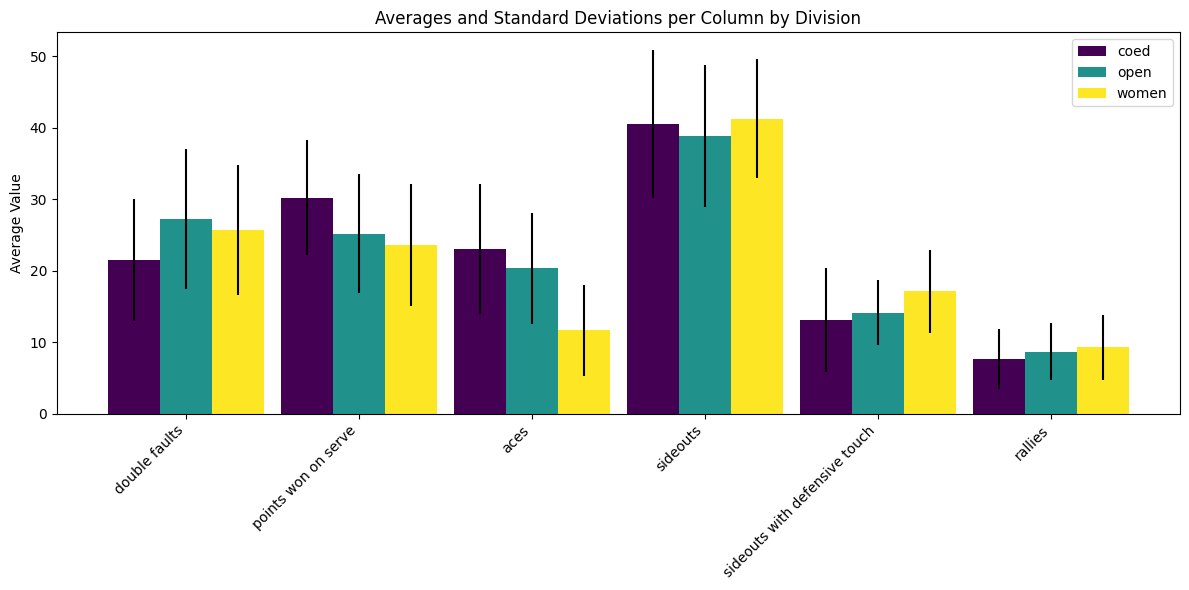

In [19]:
averages = baseline_work.groupby('division').agg({
    'double faults': 'mean',
    'points won on serve': 'mean',
    'aces': 'mean',
    'sideouts': 'mean',
    'sideouts with defensive touch': 'mean',
    'rallies': 'mean'
})
# Calculate standard deviations
std_devs = baseline_work.groupby('division').agg({
    'double faults': 'std',
    'points won on serve': 'std',
    'aces': 'std',
    'sideouts': 'std',
    'sideouts with defensive touch': 'std',
    'rallies': 'std'
})

# Create the candle chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

divisions = averages.index
num_divisions = len(divisions)
colors = plt.cm.viridis(np.linspace(0, 1, num_divisions))  # Use a colormap for different divisions
x_pos = np.arange(len(averages.columns))

width = 0.3  # Width of the bars

for i, division in enumerate(divisions):
    # Means
    means = averages.loc[division].values
    ax.bar(x_pos + i * width, means, width, label=division, color=colors[i], yerr=std_devs.loc[division].values)


ax.set_xticks(x_pos + width * (num_divisions - 1) / 2)  # Center x-axis ticks
ax.set_xticklabels(averages.columns, rotation=45, ha='right')  # Rotate x-axis labels for readability

ax.set_ylabel('Average Value')
ax.set_title('Averages and Standard Deviations per Column by Division')
ax.legend()

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


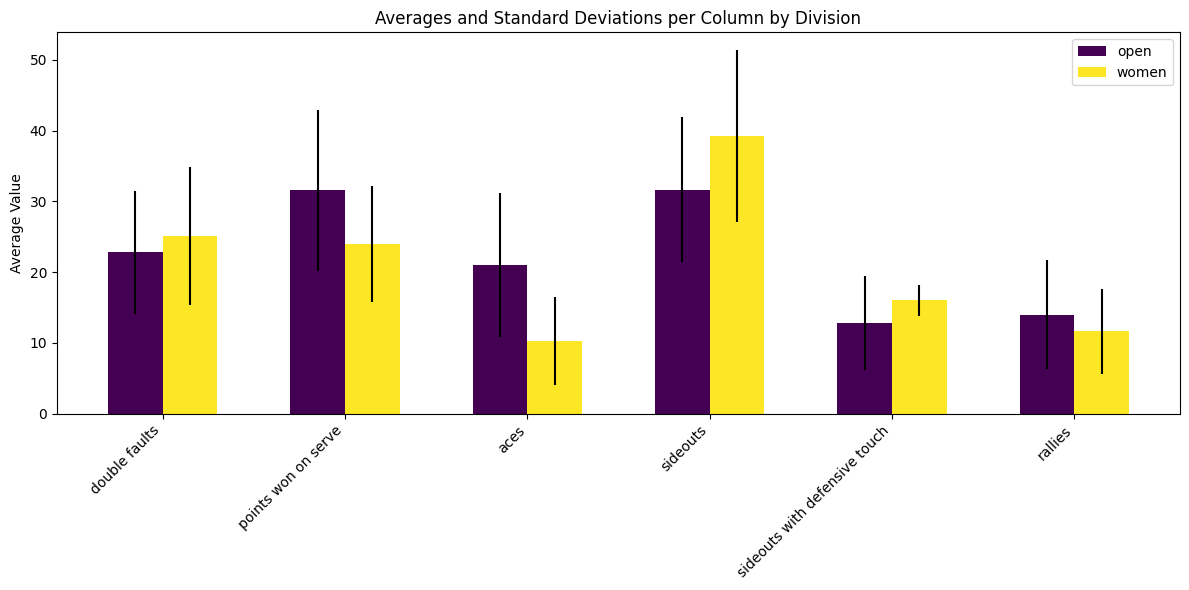

In [20]:
averages_a = package_a_work.groupby('division').agg({
    'double faults': 'mean',
    'points won on serve': 'mean',
    'aces': 'mean',
    'sideouts': 'mean',
    'sideouts with defensive touch': 'mean',
    'rallies': 'mean',
})

averages_a
# Calculate standard deviations
std_devs = package_a_work.groupby('division').agg({
    'double faults': 'std',
    'points won on serve': 'std',
    'aces': 'std',
    'sideouts': 'std',
    'sideouts with defensive touch': 'std',
    'rallies': 'std'
})

# Create the candle chart
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust figure size as needed

divisions = averages_a.index
num_divisions = len(divisions)
colors = plt.cm.viridis(np.linspace(0, 1, num_divisions))  # Use a colormap for different divisions
x_pos = np.arange(len(averages_a.columns))

width = 0.3  # Width of the bars

for i, division in enumerate(divisions):
    # Means
    means = averages_a.loc[division].values
    ax.bar(x_pos + i * width, means, width, label=division, color=colors[i], yerr=std_devs.loc[division].values)


ax.set_xticks(x_pos + width * (num_divisions - 1) / 2)  # Center x-axis ticks
ax.set_xticklabels(averages_a.columns, rotation=45, ha='right')  # Rotate x-axis labels for readability

ax.set_ylabel('Average Value')
ax.set_title('Averages and Standard Deviations per Column by Division')
ax.legend()

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


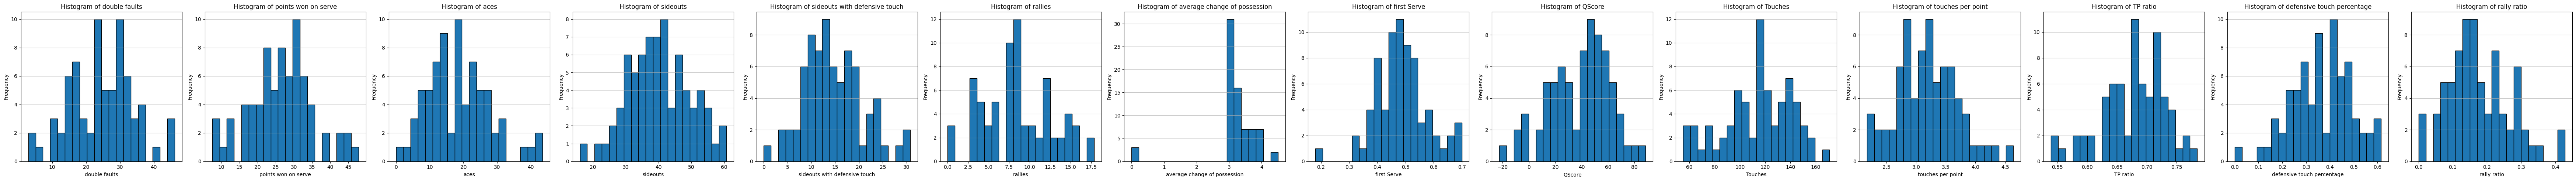

In [21]:
# prompt: can you create me a row of histograms for baseline, one histogram for each column

import matplotlib.pyplot as plt
import numpy as np
# Identify numerical columns (excluding 'division' and potentially others if they are not numerical)
numerical_cols = baseline_work.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove("points")

# Determine the number of columns to plot
n_cols = len(numerical_cols)

# Create a figure with n_cols subplots arranged in a row
fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5)) # Adjust figure size as needed

# Flatten the axes array if there's only one subplot
if n_cols == 1:
    axes = [axes]

# Iterate through each numerical column and create a histogram in the corresponding subplot
for i, col in enumerate(numerical_cols):
    axes[i].hist(baseline_work[col].dropna(), bins=20, edgecolor='black') # Drop NaNs to avoid errors
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

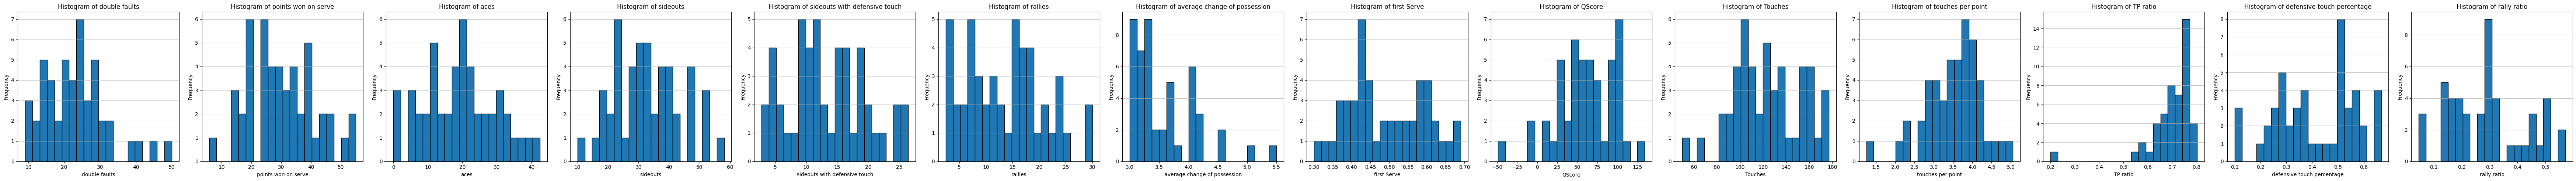

In [22]:
# prompt: can you create me a row of histograms for baseline, one histogram for each column

import matplotlib.pyplot as plt
import numpy as np
# Identify numerical columns (excluding 'division' and potentially others if they are not numerical)
numerical_cols = package_a_work.select_dtypes(include=np.number).columns.tolist()
numerical_cols.remove("points")

# Determine the number of columns to plot
n_cols = len(numerical_cols)

# Create a figure with n_cols subplots arranged in a row
fig, axes = plt.subplots(1, n_cols, figsize=(5 * n_cols, 5)) # Adjust figure size as needed

# Flatten the axes array if there's only one subplot
if n_cols == 1:
    axes = [axes]

# Iterate through each numerical column and create a histogram in the corresponding subplot
for i, col in enumerate(numerical_cols):
    axes[i].hist(package_a_work[col].dropna(), bins=20, edgecolor='black') # Drop NaNs to avoid errors
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram of {col}')
    axes[i].grid(axis='y', alpha=0.75)

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

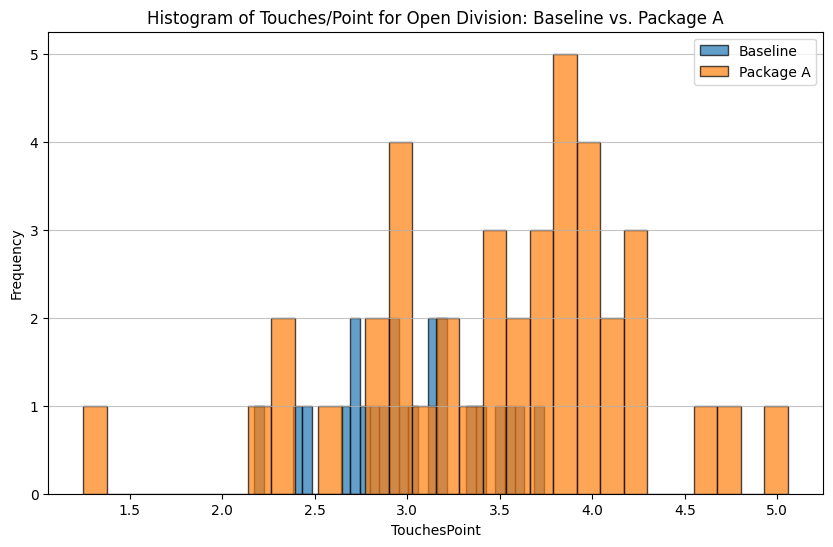

In [23]:
# prompt: can you plot a historgram of touches per point for the open division for the two datasets baseline and package_a in one graph

import matplotlib.pyplot as plt
# Filter for the 'open' division
baseline_open = baseline_work[baseline_work['division'] == 'open']['touches per point'].dropna()
package_a_open = package_a_work[package_a_work['division'] == 'open']['touches per point'].dropna()

# Create the histogram
plt.figure(figsize=(10, 6))

plt.hist(baseline_open, bins=30, alpha=0.7, label='Baseline', edgecolor='black')
plt.hist(package_a_open, bins=30, alpha=0.7, label='Package A', edgecolor='black')

plt.xlabel('TouchesPoint')
plt.ylabel('Frequency')
plt.title('Histogram of Touches/Point for Open Division: Baseline vs. Package A')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [24]:
# decide one standardized cutoff

In [25]:
# prompt: for the baseline, exclude all data points that are outside of two times standard deviation from any of the columns, but seperated by division, and show me the number of data points you excluded

import pandas as pd
import numpy as np
# Identify numerical columns to consider for outlier removal
numerical_cols = baseline_work.select_dtypes(include=np.number).columns.tolist()
if 'division' in numerical_cols:
    numerical_cols.remove('division') # Exclude 'division' if it was incorrectly included

baseline_filtered = pd.DataFrame(columns=baseline_work.columns)
excluded_count = 0

for division in baseline_work['division'].unique():
    df_division = baseline_work[baseline_work['division'] == division].copy()
    initial_rows = len(df_division)

    for col in numerical_cols:
        if col in df_division.columns and df_division[col].notna().any(): # Check if column exists and has non-NaN values
            mean = df_division[col].mean()
            std = df_division[col].std()

            if pd.notna(std) and std > 0: # Avoid division by zero if std is 0 or NaN
                # Filter out data points outside of 2 standard deviations
                df_division = df_division[(df_division[col] >= mean - 3 * std) & (df_division[col] <= mean + 3 * std)]

    excluded_count += initial_rows - len(df_division)
    baseline_filtered = pd.concat([baseline_filtered, df_division], ignore_index=True)

print(f"Number of data points excluded from baseline: {excluded_count}")

Number of data points excluded from baseline: 4


<ipython-input-25-d9d8b23067b7>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  baseline_filtered = pd.concat([baseline_filtered, df_division], ignore_index=True)


In [26]:
# prompt: for the baseline, exclude all data points that are outside of two times standard deviation from any of the columns, but seperated by division, and show me the number of data points you excluded

import pandas as pd
import numpy as np
# Identify numerical columns to consider for outlier removal
numerical_cols = package_a_work.select_dtypes(include=np.number).columns.tolist()
if 'division' in numerical_cols:
    numerical_cols.remove('division') # Exclude 'division' if it was incorrectly included

package_a_filtered = pd.DataFrame(columns=package_a_work.columns)
excluded_count = 0

for division in package_a_work['division'].unique():
    df_division = package_a_work[package_a_work['division'] == division].copy()
    initial_rows = len(df_division)

    for col in numerical_cols:
        if col in df_division.columns and df_division[col].notna().any(): # Check if column exists and has non-NaN values
            mean = df_division[col].mean()
            std = df_division[col].std()

            if pd.notna(std) and std > 0: # Avoid division by zero if std is 0 or NaN
                # Filter out data points outside of 2 standard deviations
                df_division = df_division[(df_division[col] >= mean - 3 * std) & (df_division[col] <= mean + 3 * std)]

    excluded_count += initial_rows - len(df_division)
    package_a_filtered = pd.concat([package_a_filtered, df_division], ignore_index=True)

print(f"Number of data points excluded from package_a: {excluded_count}")

Number of data points excluded from package_a: 2


<ipython-input-26-8c358fd8e9bd>:27: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  package_a_filtered = pd.concat([package_a_filtered, df_division], ignore_index=True)


In [27]:
baseline_filtered.describe()

,double faults,points won on serve,aces,sideouts,sideouts with defensive touch,rallies,average change of possession,first Serve,QScore,touches per point,TP ratio,defensive touch percentage,rally ratio
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,24.252464,26.315652,18.531159,40.461304,14.743188,8.965362,3.309710,0.492464,40.146810,3.232576,0.683814,0.362203,0.184639
std,9.384833,8.814969,9.338485,9.638904,6.342884,3.918699,0.372424,0.084269,20.924764,0.482440,0.047495,0.127650,0.084813
min,2.940000,7.500000,0.000000,16.000000,0.000000,2.700000,3.000000,0.310000,-9.630000,2.171429,0.539474,0.000000,0.052673
25%,17.140000,20.590000,12.500000,33.330000,10.260000,5.710000,3.000000,0.440000,22.800000,2.864865,0.650943,0.277904,0.124959
50%,24.440000,26.470000,17.860000,40.000000,13.510000,8.330000,3.250000,0.490000,44.157500,3.185185,0.686047,0.357247,0.166600
75%,30.300000,31.580000,24.320000,47.220000,18.920000,12.120000,3.500000,0.540000,55.310000,3.533333,0.716981,0.454661,0.235200
max,46.150000,47.830000,43.480000,60.710000,30.770000,17.860000,4.500000,0.700000,88.535800,4.640000,0.784483,0.615324,0.428571


In [28]:
package_a_filtered.describe()

,double faults,points won on serve,aces,sideouts,sideouts with defensive touch,rallies,average change of possession,first Serve,QScore,touches per point,TP ratio,defensive touch percentage,rally ratio
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,22.883043,29.616522,18.581957,33.494783,13.365652,14.002609,3.526739,0.497174,62.883198,3.550740,0.708086,0.402946,0.292694
std,7.781328,10.796051,10.141757,10.472185,6.175910,7.294027,0.483465,0.100657,32.665054,0.652699,0.058815,0.152050,0.139019
min,9.090000,5.880000,0.000000,15.380000,2.780000,2.440000,3.000000,0.330000,-3.750000,2.175000,0.540230,0.100072,0.045471
25%,16.382500,21.077500,12.030000,24.667500,9.395000,8.122500,3.170000,0.420000,41.253125,3.025646,0.669492,0.279771,0.177785
50%,23.080000,29.290000,18.810000,32.840000,12.350000,14.855000,3.330000,0.485000,64.027250,3.599324,0.722118,0.381818,0.288669
75%,27.442500,37.470000,24.240000,40.227500,17.022500,18.607500,3.957500,0.587500,90.992900,3.935315,0.745890,0.522090,0.385425
max,44.900000,55.000000,42.500000,58.060000,26.470000,30.000000,5.000000,0.690000,133.856200,5.057143,0.802260,0.666941,0.571456


In [29]:
# prompt: i want to conduct a two sided t test to check if the means differ significantly for "touches/point" between baseline and package_a but only for open division

from scipy import stats

# Filter the filtered data for the 'open' division

baseline_filtered["Touches"] = baseline_filtered["Touches"].astype(float)
package_a_filtered["Touches"] = package_a_filtered["Touches"].astype(float)

for i in baseline_work.columns.drop(["division", "points"]):
  try:
    print(i)
    baseline_open_filtered = baseline_filtered[baseline_filtered['division'] == 'open'][i].dropna()
    package_a_open_filtered = package_a_filtered[package_a_filtered['division'] == 'open'][i].dropna()

    # Perform the two-sided t-test
    t_statistic, p_value = stats.ttest_ind(baseline_open_filtered, package_a_open_filtered, equal_var=False) # Assuming unequal variances

    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}")

    # Interpret the result
    alpha = 0.1  # Significance level
    if p_value < alpha:
        print(f"\nConclusion: The means for {i} between baseline and package_a differ significantly (reject the null hypothesis).")
    else:
        print(f"\nConclusion: The means for {i} between baseline and package_a do not differ significantly (fail to reject the null hypothesis).")
    print("---")
  except TypeError:
    print(i)

double faults
T-statistic: 2.0514649132628016
P-value: 0.047329321500855934

Conclusion: The means for double faults between baseline and package_a differ significantly (reject the null hypothesis).
---
points won on serve
T-statistic: -2.264947937392834
P-value: 0.027407282053654503

Conclusion: The means for points won on serve between baseline and package_a differ significantly (reject the null hypothesis).
---
aces
T-statistic: -0.001317813653966641
P-value: 0.9989532697597083

Conclusion: The means for aces between baseline and package_a do not differ significantly (fail to reject the null hypothesis).
---
sideouts
T-statistic: 2.5257392471979716
P-value: 0.015023933727514819

Conclusion: The means for sideouts between baseline and package_a differ significantly (reject the null hypothesis).
---
sideouts with defensive touch
T-statistic: 0.9213078278428725
P-value: 0.36071325475882665

Conclusion: The means for sideouts with defensive touch between baseline and package_a do not di

In [30]:
baseline_open_filtered = baseline_filtered[baseline_filtered['division'] == 'open']
package_a_open_filtered = package_a_filtered[package_a_filtered['division'] == 'open']

In [31]:
baseline_open_filtered.describe()

,double faults,points won on serve,aces,sideouts,sideouts with defensive touch,rallies,average change of possession,first Serve,QScore,Touches,touches per point,TP ratio,defensive touch percentage,rally ratio
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,27.251739,25.184783,20.323043,38.884783,14.127391,8.681739,3.196087,0.499565,32.160330,116.130435,3.011873,0.661964,0.372500,0.186474
std,9.775000,8.300932,7.711502,9.902910,4.555869,3.990132,0.292400,0.081991,20.789448,26.605373,0.402750,0.047701,0.111090,0.092287
min,5.260000,7.690000,7.690000,25.000000,7.140000,2.860000,3.000000,0.350000,-9.630000,61.000000,2.171429,0.539474,0.217413,0.076985
25%,20.390000,21.250000,14.855000,30.535000,10.670000,5.535000,3.000000,0.440000,19.167500,99.000000,2.733974,0.634220,0.267800,0.113214
50%,27.030000,25.000000,18.920000,38.240000,13.160000,8.110000,3.000000,0.490000,31.340000,116.000000,3.000000,0.666667,0.400000,0.153743
75%,33.010000,29.865000,24.000000,45.615000,17.225000,11.615000,3.330000,0.565000,47.758150,138.500000,3.280939,0.695069,0.436518,0.244048
max,46.150000,45.710000,42.860000,60.530000,23.530000,17.860000,4.000000,0.660000,68.405000,159.000000,3.736842,0.732394,0.615324,0.416706


In [32]:
package_a_open_filtered.describe()

,double faults,points won on serve,aces,sideouts,sideouts with defensive touch,rallies,average change of possession,first Serve,QScore,Touches,touches per point,TP ratio,defensive touch percentage,rally ratio
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,22.405000,30.810789,20.326053,32.288947,12.807632,14.492368,3.552895,0.512632,64.830279,127.526316,3.562679,0.708364,0.393904,0.306341
std,7.364822,10.982513,9.994304,9.855061,6.609394,7.513089,0.496136,0.094001,33.857630,28.080711,0.673235,0.061277,0.152245,0.143886
min,9.090000,5.880000,0.000000,15.380000,2.780000,2.440000,3.000000,0.350000,-3.750000,84.000000,2.175000,0.540230,0.100072,0.045471
25%,16.382500,24.277500,14.735000,24.260000,8.820000,8.887500,3.200000,0.432500,41.354050,103.250000,3.025646,0.669492,0.276051,0.203558
50%,22.225000,30.250000,20.000000,32.175000,11.110000,15.380000,3.355000,0.515000,65.735000,122.500000,3.657658,0.726599,0.363636,0.291667
75%,27.160000,38.140000,25.752500,39.357500,16.910000,18.877500,3.957500,0.590000,93.123875,154.500000,3.935315,0.745890,0.500128,0.440476
max,44.900000,55.000000,42.500000,52.940000,26.470000,30.000000,5.000000,0.690000,133.856200,177.000000,5.057143,0.802260,0.666941,0.571456


In [ ]:
# unterscheiden sich die werte für sideout/rally/defensive touches zwischen erstem und zweitem serve
# anzahl von defensive touches (ohne conversions) - ist man näher am ziel einer defensive conversion, auch wenn sie nicht erfolgreich ist?
# länge von rallies?
# last point touches - zusammen mit rallies - haben sich die defence chancen erhöht?